<a href="https://colab.research.google.com/github/stephbi/AI-ML-Past-Projects/blob/main/CIS545_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Part 0: Loading and Storing Data**




In [ ]:
# import packages for Colab environment
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Create the kaggle directory
!mkdir ~/.kaggle

# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
# Download dataset
!!kaggle datasets download -d kornilovag94/bank-credit-default-loan-default

['Downloading bank-credit-default-loan-default.zip to /content',
 '',
 '  0% 0.00/311M [00:00<?, ?B/s]',
 '  2% 5.00M/311M [00:00<00:11, 27.1MB/s]',
 ' 10% 30.0M/311M [00:00<00:02, 125MB/s] ',
 ' 15% 46.0M/311M [00:00<00:02, 102MB/s]',
 ' 19% 58.0M/311M [00:00<00:02, 91.1MB/s]',
 ' 23% 73.0M/311M [00:01<00:04, 61.2MB/s]',
 ' 31% 97.0M/311M [00:01<00:02, 77.3MB/s]',
 ' 39% 121M/311M [00:01<00:01, 106MB/s]  ',
 ' 45% 140M/311M [00:01<00:01, 123MB/s]',
 ' 50% 156M/311M [00:01<00:01, 106MB/s]',
 ' 57% 176M/311M [00:01<00:01, 126MB/s]',
 ' 61% 191M/311M [00:01<00:00, 131MB/s]',
 ' 66% 206M/311M [00:02<00:00, 131MB/s]',
 ' 71% 221M/311M [00:02<00:00, 137MB/s]',
 ' 76% 236M/311M [00:02<00:00, 106MB/s]',
 ' 81% 252M/311M [00:02<00:00, 119MB/s]',
 ' 86% 266M/311M [00:02<00:00, 97.0MB/s]',
 ' 89% 278M/311M [00:04<00:01, 24.8MB/s]',
 ' 95% 295M/311M [00:04<00:00, 34.8MB/s]',
 ' 98% 306M/311M [00:04<00:00, 41.0MB/s]',
 '',
 '100% 311M/311M [00:04<00:00, 70.7MB/s]']

In [ ]:
# Unzip folder in Colab content folder
!unzip /content/bank-credit-default-loan-default.zip

Archive:  /content/bank-credit-default-loan-default.zip
  inflating: data/train_data/train_data_0.pq  
  inflating: data/train_data/train_data_1.pq  
  inflating: data/train_data/train_data_10.pq  
  inflating: data/train_data/train_data_11.pq  
  inflating: data/train_data/train_data_2.pq  
  inflating: data/train_data/train_data_3.pq  
  inflating: data/train_data/train_data_4.pq  
  inflating: data/train_data/train_data_5.pq  
  inflating: data/train_data/train_data_6.pq  
  inflating: data/train_data/train_data_7.pq  
  inflating: data/train_data/train_data_8.pq  
  inflating: data/train_data/train_data_9.pq  
  inflating: target.csv              


In [ ]:
# Run to allow colab notebook to connect to & use your EMR
!apt install libkrb5-dev
!pip install sparkmagic
%load_ext sparkmagic.magics

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libkrb5-dev is already the newest version (1.19.2-2ubuntu0.3).
libkrb5-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 11.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Increases size of data that worker nodes can send to driver in Spark and driver memory
%%spark config
{"name":"remotesparkmagics-sample", "conf":{"spark.driver.maxResultSize":"4g", "spark.driver.memory": "2500M"}}

In [ ]:
# Connects notebook to EMR cluster created in AWS console: Copy the line above, enter your Master Public DNS with the proper formatting and host, and update the password
%spark add -s spark_session -l python -u 	http://ec2-100-25-144-41.compute-1.amazonaws.com/ -a cis545-livy -p cis545-livypassword -t Basic_Access

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
3,application_1702337680841_0004,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


In [ ]:
%%spark
# import packages for Spark environment
import pyspark
from pyspark.sql.functions import col
from pyspark import SparkFiles
from pyspark.sql.types import *
from pyspark.ml.feature import PCA, VectorAssembler, StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.mllib.evaluation import MulticlassMetrics

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
# defines schema for the bank-credit-default-loan-default dataset
loans_schema = StructType([
     StructField("id", IntegerType(), nullable=True),
     StructField("rn", IntegerType(), nullable=True),
     StructField("pre_since_opened", FloatType(), nullable=True),
     StructField("pre_since_confirmed", IntegerType(), nullable=True),
     StructField("pre_pterm", IntegerType(), nullable=True),
     StructField("pre_fterm", IntegerType(), nullable=True),
     StructField("pre_till_pclose", IntegerType(), nullable=True),
     StructField("pre_till_fclose", IntegerType(), nullable=True),
     StructField("pre_loans_credit_limit", IntegerType(), nullable=True),
     StructField("pre_loans_next_pay_summ", IntegerType(), nullable=True),
     StructField("pre_loans_outstanding", IntegerType(), nullable=True),
     StructField("pre_loans_total_overdue", IntegerType(), nullable=True),
     StructField("pre_loans_max_overdue_sum", IntegerType(), nullable=True),
     StructField("pre_loans_credit_cost_rate", IntegerType(), nullable=True),
     StructField("pre_loans5", IntegerType(), nullable=True),
     StructField("pre_loans530", IntegerType(), nullable=True),
     StructField("pre_loans3060", IntegerType(), nullable=True),
     StructField("pre_loans6090", IntegerType(), nullable=True),
     StructField("pre_loans90", IntegerType(), nullable=True),
     StructField("is_zero_loans5", IntegerType(), nullable=True),
     StructField("is_zero_loans530", IntegerType(), nullable=True),
     StructField("is_zero_loans3060", IntegerType(), nullable=True),
     StructField("is_zero_loans6090", IntegerType(), nullable=True),
     StructField("is_zero_loans90", IntegerType(), nullable=True),
     StructField("pre_util", IntegerType(), nullable=True),
     StructField("pre_over2limit", IntegerType(), nullable=True),
     StructField("pre_maxover2limit", IntegerType(), nullable=True),
     StructField("is_zero_util", IntegerType(), nullable=True),
     StructField("is_zero_over2limit", IntegerType(), nullable=True),
     StructField("is_zero_maxover2limit", IntegerType(), nullable=True),
     StructField("enc_paym_0", IntegerType(), nullable=True),
     StructField("enc_paym_1", IntegerType(), nullable=True),
     StructField("enc_paym_2", IntegerType(), nullable=True),
     StructField("enc_paym_3", IntegerType(), nullable=True),
     StructField("enc_paym_4", IntegerType(), nullable=True),
     StructField("enc_paym_5", IntegerType(), nullable=True),
     StructField("enc_paym_6", IntegerType(), nullable=True),
     StructField("enc_paym_7", IntegerType(), nullable=True),
     StructField("enc_paym_8", IntegerType(), nullable=True),
     StructField("enc_paym_9", IntegerType(), nullable=True),
     StructField("enc_paym_10", IntegerType(), nullable=True),
     StructField("enc_paym_11", IntegerType(), nullable=True),
     StructField("enc_paym_12", IntegerType(), nullable=True),
     StructField("enc_paym_13", IntegerType(), nullable=True),
     StructField("enc_paym_14", IntegerType(), nullable=True),
     StructField("enc_paym_15", IntegerType(), nullable=True),
     StructField("enc_paym_16", IntegerType(), nullable=True),
     StructField("enc_paym_17", IntegerType(), nullable=True),
     StructField("enc_paym_18", IntegerType(), nullable=True),
     StructField("enc_paym_19", IntegerType(), nullable=True),
     StructField("enc_paym_20", IntegerType(), nullable=True),
     StructField("enc_paym_21", IntegerType(), nullable=True),
     StructField("enc_paym_22", IntegerType(), nullable=True),
     StructField("enc_paym_23", IntegerType(), nullable=True),
     StructField("enc_paym_24", IntegerType(), nullable=True),
     StructField("enc_loans_account_holder_type", IntegerType(), nullable=True),
     StructField("enc_loans_credit_status", IntegerType(), nullable=True),
     StructField("enc_loans_credit_type", IntegerType(), nullable=True),
     StructField("enc_loans_account_cur", IntegerType(), nullable=True),
     StructField("pclose_flag", IntegerType(), nullable=True),
     StructField("fclose_flag", IntegerType(), nullable=True),
])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
# loads all 12 dataset parquet files from our S3 bucket into Spark dataframe (sdf)
data_url_0 = "https://cis545-final-project-data.s3.amazonaws.com/train_data_11.pq"
sc.addFile(data_url_0)
path_0  = SparkFiles.get('download')
data_0_sdf = spark.read.parquet('file://'+SparkFiles.get('train_data_11.pq'),header=True,schema = loans_schema,quote='\"',escape='\"')

data_url_1 = "https://cis545-final-project-data.s3.amazonaws.com/train_data_0.pq"
sc.addFile(data_url_1)
path_1  = SparkFiles.get('download')
data_1_sdf = spark.read.parquet('file://'+SparkFiles.get('train_data_0.pq'),header=True,schema = loans_schema,quote='\"',escape='\"')

data_url_2 = "https://cis545-final-project-data.s3.amazonaws.com/train_data_1.pq"
sc.addFile(data_url_2)
path_2  = SparkFiles.get('download')
data_2_sdf = spark.read.parquet('file://'+SparkFiles.get('train_data_1.pq'),header=True,schema = loans_schema,quote='\"',escape='\"')

data_url_3 = "https://cis545-final-project-data.s3.amazonaws.com/train_data_2.pq"
sc.addFile(data_url_3)
path_3  = SparkFiles.get('download')
data_3_sdf = spark.read.parquet('file://'+SparkFiles.get('train_data_2.pq'),header=True,schema = loans_schema,quote='\"',escape='\"')

data_url_4 = "https://cis545-final-project-data.s3.amazonaws.com/train_data_3.pq"
sc.addFile(data_url_4)
path_4  = SparkFiles.get('download')
data_4_sdf = spark.read.parquet('file://'+SparkFiles.get('train_data_3.pq'),header=True,schema = loans_schema,quote='\"',escape='\"')

data_url_5 = "https://cis545-final-project-data.s3.amazonaws.com/train_data_4.pq"
sc.addFile(data_url_5)
path_5  = SparkFiles.get('download')
data_5_sdf = spark.read.parquet('file://'+SparkFiles.get('train_data_4.pq'),header=True,schema = loans_schema,quote='\"',escape='\"')

data_url_6 = "https://cis545-final-project-data.s3.amazonaws.com/train_data_5.pq"
sc.addFile(data_url_6)
path_6  = SparkFiles.get('download')
data_6_sdf = spark.read.parquet('file://'+SparkFiles.get('train_data_5.pq'),header=True,schema = loans_schema,quote='\"',escape='\"')

data_url_7 = "https://cis545-final-project-data.s3.amazonaws.com/train_data_6.pq"
sc.addFile(data_url_7)
path_7  = SparkFiles.get('download')
data_7_sdf = spark.read.parquet('file://'+SparkFiles.get('train_data_6.pq'),header=True,schema = loans_schema,quote='\"',escape='\"')

data_url_8 = "https://cis545-final-project-data.s3.amazonaws.com/train_data_7.pq"
sc.addFile(data_url_8)
path_8  = SparkFiles.get('download')
data_8_sdf = spark.read.parquet('file://'+SparkFiles.get('train_data_7.pq'),header=True,schema = loans_schema,quote='\"',escape='\"')

data_url_9 = "https://cis545-final-project-data.s3.amazonaws.com/train_data_8.pq"
sc.addFile(data_url_9)
path_9  = SparkFiles.get('download')
data_9_sdf = spark.read.parquet('file://'+SparkFiles.get('train_data_8.pq'),header=True,schema = loans_schema,quote='\"',escape='\"')

data_url_10 = "https://cis545-final-project-data.s3.amazonaws.com/train_data_9.pq"
sc.addFile(data_url_10)
path_10  = SparkFiles.get('download')
data_10_sdf = spark.read.parquet('file://'+SparkFiles.get('train_data_9.pq'),header=True,schema = loans_schema,quote='\"',escape='\"')

data_url_11 = "https://cis545-final-project-data.s3.amazonaws.com/train_data_10.pq"
sc.addFile(data_url_11)
path_11  = SparkFiles.get('download')
data_11_sdf = spark.read.parquet('file://'+SparkFiles.get('train_data_10.pq'),header=True,schema = loans_schema,quote='\"',escape='\"')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
# defines schema for the target data file (it is separate from rest of data files)
flag_schema = StructType([
     StructField("id", IntegerType(), nullable=True),
     StructField("flag", IntegerType(), nullable=True),
])

# loads target csv file from S3 bucket into Spark dataframe (sdf)
data_url_flag = "https://cis545-final-project-data.s3.amazonaws.com/target.csv"
sc.addFile(data_url_flag)
path_flag  = SparkFiles.get('download')
data_flag_sdf = spark.read.csv('file://'+SparkFiles.get('target.csv'),header=True,schema = flag_schema,quote='\"',escape='\"')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
# rename 'id' column in target sdf to flag_id to differentiate from
# 'id' column in rest of dataset sdf's
data_flag_sdf = data_flag_sdf.withColumnRenamed('id', 'flag_id')

# append all 12 dataset sdf's into 1 sdf for processing
full_data_sdf = data_0_sdf.unionAll(data_1_sdf).unionAll(data_2_sdf).unionAll(data_3_sdf).unionAll(data_4_sdf).unionAll(data_5_sdf).unionAll(data_6_sdf).unionAll(data_7_sdf).unionAll(data_8_sdf).unionAll(data_9_sdf).unionAll(data_10_sdf).unionAll(data_11_sdf)

# join dataset sdf's with target sdf on 'id' to get sdf with all data + target column
full_data_with_flags_sdf = full_data_sdf.join(data_flag_sdf, full_data_sdf.id == data_flag_sdf.flag_id, 'inner')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
# Randomly select 250,000 rows as a representative sample of the larger dataset
# This helps cut down on computation time
full_data_with_flags_sdf.createOrReplaceTempView("full_data")

query = '''SELECT *
           FROM full_data
           ORDER BY RAND(15)
           LIMIT 250000'''

# Save the output sdf
random_data_sdf = spark.sql(query)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# **Part 1: Data Formatting and Preprocessing**

## **Part 1.1:** One-hot Encoding and Clean Up

In [ ]:
%%spark
from pyspark.sql.functions import when
# one-hot encode categorical variables enc_loans_account_holder_type & enc_loans_credit_status
categorical_3 = ['enc_loans_account_holder_type', 'enc_loans_credit_status']

for col in categorical_3:
  for distinct in [0, 1, 2, 3, 4, 5, 6]:
    new_col_name = col + '-' + str(distinct)
    random_data_sdf = random_data_sdf.withColumn(new_col_name, when(random_data_sdf[col] == distinct, 1).otherwise(0))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
# one-hot encode categorical variables enc_loans_credit_type
categorical_4 = ['enc_loans_credit_type']

for col in categorical_4:
  for distinct in [0, 1, 2, 3, 4, 5]:
    new_col_name = col + '-' + str(distinct)
    random_data_sdf = random_data_sdf.withColumn(new_col_name, when(random_data_sdf[col] == distinct, 1).otherwise(0))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
# splits entire dataset into non-default (negative) and default (positive) sdf's & drops null values
non_default_sdf = random_data_sdf[random_data_sdf['flag'] == 0].na.drop().dropDuplicates()
default_sdf = random_data_sdf[random_data_sdf['flag'] == 1].na.drop().dropDuplicates()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Part 1.2 Data Pre-Processing

In [ ]:
%%spark
# Extract columns to be used as features in the models
feature_columns = random_data_sdf.columns
# Remove the label column (flag) and extraneous columns
drop_list = ['id', 'rn', 'flag', 'flag_id', 'enc_loans_account_holder_type', 'enc_loans_credit_status', 'enc_loans_credit_type']
for i in range(24):
  drop_list.append('enc_paym_{i}')
feature_columns = [x for x in feature_columns if x not in drop_list]
# Create features column
proc_default_sdf = VectorAssembler(inputCols=feature_columns, outputCol='features').transform(default_sdf)
proc_non_default_sdf = VectorAssembler(inputCols=feature_columns, outputCol='features').transform(non_default_sdf)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
random_seed = 21
# Split data into training and testing sets w/ a 80/20 split
train_default_sdf, test_default_sdf = proc_default_sdf.randomSplit([0.8, 0.2], seed=random_seed)
train_non_default_sdf, test_non_default_sdf = proc_non_default_sdf.randomSplit([0.8, 0.2], seed=random_seed)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
from pyspark.sql.functions import col, explode, array, lit
# Undersample the nondefaulted train cases
train_non_default_under_sdf = train_non_default_sdf.sample(False, 0.2)
# Oversample the defaulted train cases
train_default_over_sdf = train_default_sdf.withColumn("dummy", explode(array([lit(x) for x in range(3)]))).drop('dummy')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
# Combine default and nondefault training and test sets
train_sdf = train_default_over_sdf.unionAll(train_non_default_under_sdf)
test_sdf = test_default_sdf.unionAll(test_non_default_sdf)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
# Scale data for better classification and pca
scaler = StandardScaler(inputCol='features', outputCol='features_scaled')
scaler = scaler.fit(train_sdf)
scaled_train_sdf = scaler.transform(train_sdf)
scaled_test_sdf = scaler.transform(test_sdf)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
#Split train into train and validation sets for hyperparameter tuning
train_val_default_sdf, val_default_sdf = train_default_over_sdf.randomSplit([0.8, 0.2], seed=random_seed)
train_val_non_default_sdf, val_non_default_sdf = train_non_default_under_sdf.randomSplit([0.8, 0.2], seed=random_seed)
train_val_sdf = train_val_default_sdf.unionAll(train_val_non_default_sdf)
val_sdf = val_default_sdf.unionAll(val_non_default_sdf)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
# Scale data for better classification for hyperparameter validation
scaler = StandardScaler(inputCol='features', outputCol='val_features_scaled')
scaler = scaler.fit(train_val_sdf)
scaled_train_val_sdf = scaler.transform(train_val_sdf)
scaled_val_sdf = scaler.transform(val_sdf)
scaled_test_val_sdf = scaler.transform(test_sdf)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Part 2: EDA

## **Part 2.1:** Query Data for Visualization

In [ ]:
# Transfer sdf to pandas in Colab env
%spark -o random_data_sdf

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
# Randomly sample 25,000 rows as a representative sample for the purpose of plotting
random_data_sdf.createOrReplaceTempView("random_data")

query = '''SELECT *
           FROM random_data
           ORDER BY RAND(15)
           LIMIT 25000'''

# Save the output sdf
plotting_data_sdf = spark.sql(query)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
# Randomly sample 25,000 defaulted rows to better examine the default cases
query = '''SELECT *
           FROM random_data
           WHERE flag = 1
           ORDER BY RAND(15)
           LIMIT 25000'''

# Save the output sdf
plot_default_sdf = spark.sql(query)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
# Transfer plotting_sdf to Colab environment for plotting purposes
%spark -o plotting_data_sdf -n 25000

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
# Transfer default_sdf to Colab environment for plotting purposes
%spark -o plot_default_sdf -n 25000

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## **Part 2.2:** Summary Statistics

In [ ]:
# Observe summary of random data, but too many parameters so hard to interpret
plotting_data_sdf.describe()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_loans_credit_status-3,enc_loans_credit_status-4,enc_loans_credit_status-5,enc_loans_credit_status-6,enc_loans_credit_type-0,enc_loans_credit_type-1,enc_loans_credit_type-2,enc_loans_credit_type-3,enc_loans_credit_type-4,enc_loans_credit_type-5
count,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,1.542122e+06,6.981840,9.386760,8.191520,8.361360,8.348680,7.192520,8.36640,9.645000,2.358240,...,0.676240,0.007440,0.002960,0.000120,0.028080,0.035160,0.023200,0.293800,0.565560,0.041200
std,8.710274e+05,5.336974,5.775177,4.719556,5.306003,4.495784,5.138376,4.23373,5.803813,1.291716,...,0.467919,0.085936,0.054326,0.010954,0.165205,0.184188,0.150541,0.455511,0.495693,0.198756
min,2.100000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.836010e+05,3.000000,4.000000,4.000000,4.000000,6.000000,2.000000,5.00000,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.567020e+06,6.000000,9.000000,9.000000,8.000000,8.000000,7.000000,10.00000,10.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.304534e+06,10.000000,14.000000,12.000000,14.000000,12.000000,12.000000,11.00000,14.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2.999782e+06,37.000000,19.000000,17.000000,17.000000,16.000000,16.000000,15.00000,19.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Observe summary of defaulted data, but too many parameters so hard to interpret
plot_default_sdf.describe()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_loans_credit_status-3,enc_loans_credit_status-4,enc_loans_credit_status-5,enc_loans_credit_status-6,enc_loans_credit_type-0,enc_loans_credit_type-1,enc_loans_credit_type-2,enc_loans_credit_type-3,enc_loans_credit_type-4,enc_loans_credit_type-5
count,2.416700e+04,24167.000000,24167.000000,24167.000000,24167.000000,24167.000000,24167.000000,24167.000000,24167.000000,24167.000000,...,24167.000000,24167.000000,24167.000000,24167.000000,24167.000000,24167.000000,24167.000000,24167.000000,24167.000000,24167.000000
mean,1.539772e+06,6.973642,9.376878,8.196797,8.357843,8.358878,7.188935,8.358050,9.631729,2.358712,...,0.676956,0.007448,0.002772,0.000124,0.028469,0.035420,0.023751,0.294161,0.565399,0.039765
std,8.727200e+05,5.323819,5.776426,4.721579,5.307133,4.505417,5.139450,4.232606,5.802996,1.292927,...,0.467649,0.085983,0.052581,0.011141,0.166311,0.184843,0.152277,0.455674,0.495715,0.195411
min,2.100000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.776460e+05,3.000000,4.000000,4.000000,4.000000,6.000000,2.000000,5.000000,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.564447e+06,6.000000,9.000000,9.000000,8.000000,8.000000,7.000000,10.000000,10.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.304648e+06,10.000000,14.000000,12.000000,13.000000,12.000000,12.000000,11.000000,14.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2.999782e+06,37.000000,19.000000,17.000000,17.000000,16.000000,16.000000,15.000000,19.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Part 2.3:** Visualizations

### **Part 2.3.1:** Class Imbalance

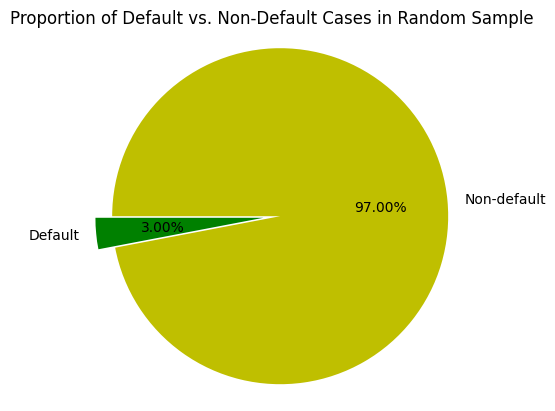

In [ ]:
# Create pie chart to visualize class imbalance
labels = 'Default', 'Non-default'
count_default = len(random_data_sdf[random_data_sdf['flag'] == 1])
count_non_default = len(random_data_sdf[random_data_sdf['flag'] == 0])
sections = [count_default, count_non_default]
colors = ['g','y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=180,
        explode = (0, 0.1),
        autopct = '%1.2f%%')

plt.axis('equal')
plt.title('Proportion of Default vs. Non-Default Cases in Random Sample')
plt.show()
# Overall shows dataset is heavily imbalanced, with much less default cases

### **Part 2.3.2:** Distribution of Credit Limit

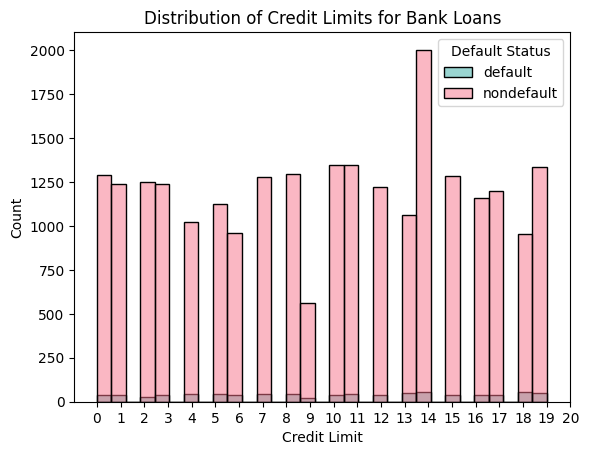

In [ ]:
# Plot histogram of credit limits of the representative sample
sns.histplot(data=plotting_data_sdf,
             x='pre_loans_credit_limit',
             hue='flag',
             palette = 'husl',
             alpha=0.5
             )
plt.title('Distribution of Credit Limits for Bank Loans')
plt.xlabel('Credit Limit')
plt.xticks(np.arange(0, 21, 1))
plt.legend(title='Default Status', labels=['default', 'nondefault'])

# Based on the plot, it's shown that most lendees do not default on their loans
# Fairly even distribution of defaulted loans based on credit limits, but the scale is so small that it's indeterminate from this plot alone

<ipython-input-58-a41f18859f28>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=plot_default_sdf,


Text(0.5, 0, 'Credit Limit')

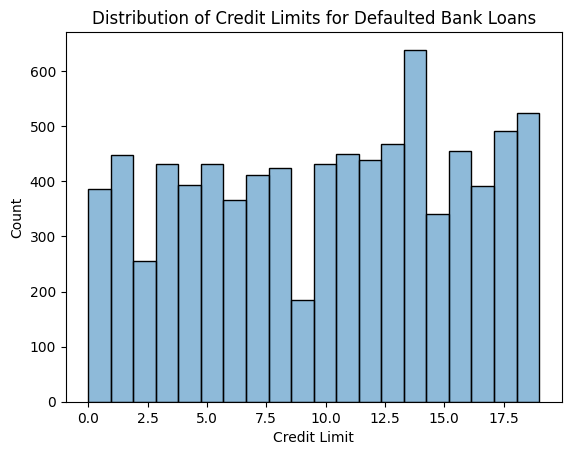

In [ ]:
# Plot histogram of credit limits of defaulted loans
sns.histplot(data=plot_default_sdf,
             x='pre_loans_credit_limit',
             palette = 'husl',
             alpha=0.5
             )
plt.title('Distribution of Credit Limits for Defaulted Bank Loans')
plt.xlabel('Credit Limit')
# Distribution of credit limits for defaulted loans roughly mirrors those of non defaulted loans,
# though there is a slightly higher incidence of loans with higher credit limits that default

### **Part 2.3.3:** Distribution of Credit Costs

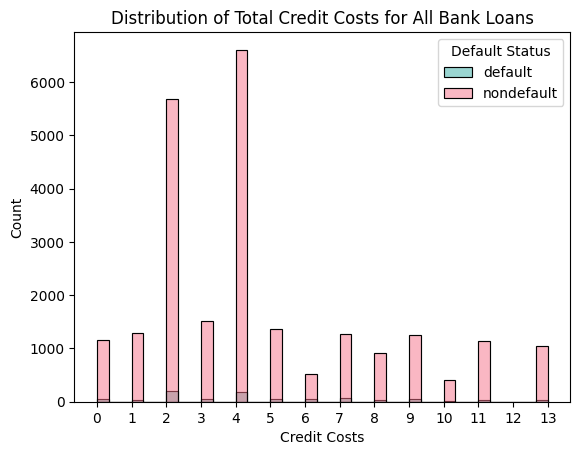

In [ ]:
# Plot histogram of credit costs for all loans
sns.histplot(data=plotting_data_sdf,
             x='pre_loans_credit_cost_rate',
             hue='flag',
             palette = 'husl',
             alpha=0.5
             )
plt.title('Distribution of Total Credit Costs for All Bank Loans')
plt.xlabel('Credit Costs')
plt.xticks(np.arange(0, 14, 1))
plt.legend(title='Default Status', labels=['default', 'nondefault'])
plt.show()
# Overall shows that most loans have costs of 2 or 4, with default loans having similar distributions.
# However, hard to see distribution of defaulted loans

<ipython-input-66-35dda391d7bd>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=plot_default_sdf,


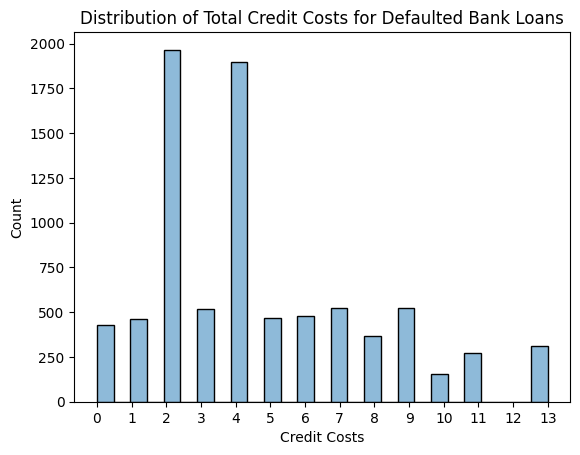

In [ ]:
# Plot histogram of credit costs for defaulted loans
sns.histplot(data=plot_default_sdf,
             x='pre_loans_credit_cost_rate',
             palette = 'husl',
             alpha=0.5
             )
plt.title('Distribution of Total Credit Costs for Defaulted Bank Loans')
plt.xlabel('Credit Costs')
plt.xticks(np.arange(0, 14, 1))
plt.show()
# Overall defaulted loans seem to have a similar distribution, so the cost of credit
# may be an unreliable factor in credit costs

### **Part 2.3.4:** PCA

In [ ]:
%%spark
# Use PCA to attempt to reduce the dimensions of the data w/ k=50 to visualize cumulative variance of PC's
pca = PCA(k=50, inputCol='features_scaled', outputCol='features_pca').fit(scaled_train_sdf)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
# Extract cumulative variance of pca PC's and add to Spark Dataframe
pca_explained_variance = pca.explainedVariance.toArray().cumsum()
schema = StructType([
    StructField("cumulative_variance",FloatType(),True)])
cum_var = spark.createDataFrame(pca_explained_variance, schema=schema)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
# Transfer cumulative PCA variances to Colab env
%spark -o cum_var

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

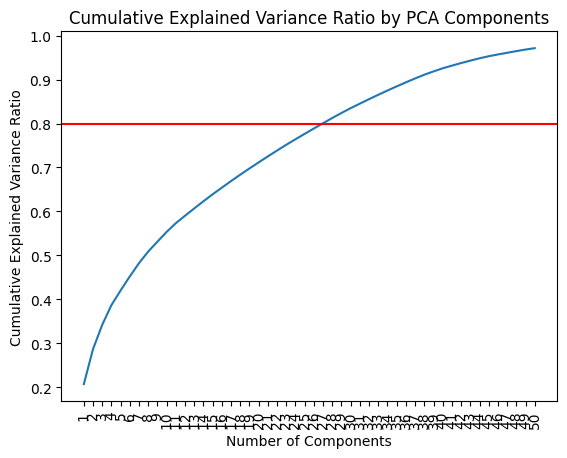

<Figure size 1500x1000 with 0 Axes>

In [ ]:
# Plot line chart of PCA cumulative explained variances
num_comp = np.arange(1, len(cum_var) + 1)
plt.plot(num_comp, cum_var)
plt.axhline(y=0.8, color='r', )
plt.xlabel('Number of Components')
plt.xticks(num_comp, rotation=90)
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by PCA Components')
plt.figure(figsize=(15,10))
plt.show()
# Able to hit 0.8 explained variance ratio by 27-28 PC's, informing us that we
# only have to run PCA with k=28 to reduce the dimensions of the data.

In [ ]:
%%time
%%spark
# Create new PCA w/ k=28, fit on scaled_train_sdf and transform the train and test datasets
pca_final = PCA(k=28, inputCol='features_scaled', outputCol='features_pca_new').fit(scaled_train_sdf)
pca_train_sdf = pca_final.transform(scaled_train_sdf)
pca_test_sdf = pca_final.transform(scaled_test_sdf)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

CPU times: user 2.33 s, sys: 278 ms, total: 2.61 s
Wall time: 5min 57s


# Part 3: Modelling

## **Part 3.1: Baseline Logistic Regression**

In [ ]:
%%time
%%spark
# Initialize and fit baseline logreg model
base_lr_model = LogisticRegression(featuresCol='features_scaled',
                              labelCol='flag',
                              family='multinomial',
                              maxIter=5).fit(scaled_train_sdf)
# Transform on test set and extract training recall
test_pred_base = base_lr_model.transform(scaled_test_sdf)
train_recall_base = base_lr_model.summary.recallByLabel
print(train_recall_base)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[0.9642810989635833, 0.09020968471866044]CPU times: user 2.57 s, sys: 335 ms, total: 2.9 s
Wall time: 7min 3s


In [ ]:
%%time
%%spark
# Extract testing recall
test_pred_base = test_pred_base.withColumn('flag', col('flag').cast(DoubleType()))
mcm_base = MulticlassMetrics(test_pred_base.select('prediction', 'flag').rdd)
print("Recall for nondefault: {}, Recall for default: {}".format(mcm_base.recall(0.0), mcm_base.recall(1.0)))
# Extract confusion matrix, which shows that we're getting a lot of false positives and false negatives
mcm_base.confusionMatrix().toArray()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Recall for nondefault: 0.9640610775469668, Recall for default: 0.08777969018932874
array([[46595.,  1737.],
       [ 1590.,   153.]])
/mnt/yarn/usercache/livy/appcache/application_1702326960159_0005/container_1702326960159_0005_01_000001/pyspark.zip/pyspark/sql/context.py:159: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.CPU times: user 1.55 s, sys: 182 ms, total: 1.73 s
Wall time: 4min 8s


## **Part 3.2: PCA Log Reg**

In [ ]:
%%time
%%spark
# Initialize and fit PCA logreg model
pca_lr_model = LogisticRegression(featuresCol='features_pca_new',
                              labelCol='flag',
                              family='multinomial',
                              maxIter=5).fit(pca_train_sdf)
# Transform on test set and extract training recall
test_pred_pca = pca_lr_model.transform(pca_test_sdf)
train_recall_pca = pca_lr_model.summary.recallByLabel
print(train_recall_pca)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[0.9644754661943953, 0.08674008146025042]CPU times: user 3.27 s, sys: 367 ms, total: 3.64 s
Wall time: 8min 19s


In [ ]:
%%time
%%spark
# Extract testing recall
test_pred_pca = test_pred_pca.withColumn('flag', col('flag').cast(DoubleType()))
pca_mcm = MulticlassMetrics(test_pred_pca.select('prediction', 'flag').rdd)
print("Recall for nondefault: {}, Recall for default: {}".format(pca_mcm.recall(0.0), pca_mcm.recall(1.0)))
# Extract confusion matrix, which shows that we're getting a lot of false positives and false negatives
pca_mcm.confusionMatrix().toArray()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
Invalid status code '400' from http://ec2-100-25-144-41.compute-1.amazonaws.com/sessions/3/statements/20 with error payload: {"msg":"requirement failed: Session isn't active."}


CPU times: user 1.42 s, sys: 165 ms, total: 1.58 s
Wall time: 3min 39s


## **Part 3.3: Regularized Logistic Regression**

In [ ]:
%%time
%%spark
from sklearn.model_selection import ParameterGrid
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
# Create parameter grid and iterator, establish variables for hyperparameter tuning
pgrid = ParameterGrid({'regParam': [0.01, 0.1], 'elasticNetParam': [0.0, 0.5, 1.0]})

evaluator = BinaryClassificationEvaluator(labelCol='flag')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

CPU times: user 36.3 ms, sys: 4.15 ms, total: 40.4 ms
Wall time: 1.78 s


In [ ]:
%%time
%%spark
# Establish variables for hyperparameter tuning
param_iter = iter(pgrid)
best_param = {}
best_param_eval = 0
auc_pr_list = []
# For-loop for hyperparameter tuning
for i in range(6):
  # Iterate parameter grid, print run info, initialize and train reg lr model
  param = next(param_iter)
  print("Run {}, parameter set is {}".format(i, param))
  reg_lr_model = LogisticRegression(featuresCol='val_features_scaled',
                                labelCol='flag',
                                family='multinomial',
                                regParam=param['regParam'],
                                elasticNetParam=param['elasticNetParam'],
                                maxIter=5).fit(scaled_train_val_sdf)
  # Predict based on validation set and extract area under precision-recall curve
  val_pred = reg_lr_model.transform(scaled_val_sdf)
  auc_pr = evaluator.evaluate(val_pred, {evaluator.metricName: "areaUnderPR"})
  auc_pr_list.append(auc_pr)
  print("auc_pr: {}".format(auc_pr))
  # Save latest parameters and auc_pr if better than previous runs
  if auc_pr > best_param_eval:
    best_param_eval = auc_pr
    best_param = param

  print("Run {}, best parameter set is {}, auc-pr is {}".format(i, best_param, best_param_eval))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Run 0, parameter set is {'elasticNetParam': 0.0, 'regParam': 0.01}
auc_pr: 0.4477078415908293
Run 0, best parameter set is {'elasticNetParam': 0.0, 'regParam': 0.01}, auc-pr is 0.4477078415908293
Run 1, parameter set is {'elasticNetParam': 0.0, 'regParam': 0.1}
auc_pr: 0.4471348383756865
Run 1, best parameter set is {'elasticNetParam': 0.0, 'regParam': 0.01}, auc-pr is 0.4477078415908293
Run 2, parameter set is {'elasticNetParam': 0.5, 'regParam': 0.01}
auc_pr: 0.4459294301548676
Run 2, best parameter set is {'elasticNetParam': 0.0, 'regParam': 0.01}, auc-pr is 0.4477078415908293
Run 3, parameter set is {'elasticNetParam': 0.5, 'regParam': 0.1}
auc_pr: 0.3397992746900565
Run 3, best parameter set is {'elasticNetParam': 0.0, 'regParam': 0.01}, auc-pr is 0.4477078415908293
Run 4, parameter set is {'elasticNetParam': 1.0, 'regParam': 0.01}
auc_pr: 0.44323529087467145
Run 4, best parameter set is {'elasticNetParam': 0.0, 'regParam': 0.01}, auc-pr is 0.4477078415908293
Run 5, parameter set 

In [ ]:
%%time
%%spark
# Initialize regularized logreg model with optimal hyperparameters from hyperparameter tuning and fit on training data
best_reg_lr_model = LogisticRegression(featuresCol='val_features_scaled',
                              labelCol='flag',
                              family='multinomial',
                              regParam=0.01,
                              elasticNetParam=0.0,
                              maxIter=8).fit(scaled_train_val_sdf)
# Get predictions on test data using new best model
best_reg_test_pred = best_reg_lr_model.transform(scaled_test_val_sdf)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

CPU times: user 1.91 s, sys: 242 ms, total: 2.15 s
Wall time: 5min 12s


In [ ]:
%%time
%%spark
# Extract recall and confusion matrix from best model predictions
best_reg_test_pred = best_reg_test_pred.withColumn('flag', col('flag').cast(DoubleType()))
mcm_reg = MulticlassMetrics(best_reg_test_pred.select('prediction', 'flag').rdd)
print(mcm_reg.confusionMatrix().toArray())
mcm_reg.recall(1.0)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[[46260.  2072.]
 [ 1558.   185.]]
0.10613884107860011
/mnt/yarn/usercache/livy/appcache/application_1702326960159_0002/container_1702326960159_0002_01_000001/pyspark.zip/pyspark/sql/context.py:159: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.

## **Part 3.4: Random Forest**

In [ ]:
%%time
%%spark
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors


# Initialize and fit the Random Forest model
randForest = RandomForestClassifier(labelCol="flag", featuresCol="features_pca_new", numTrees=50, maxDepth=5, seed=42)
model = randForest.fit(pca_train_sdf)

# Use the model to predict on the test set
predictions = model.transform(pca_test_sdf)

# Confusion Matrix
conf_matrix = predictions.groupBy('flag', 'prediction').count().toPandas()
conf_matrix_pivot = conf_matrix.pivot(index='flag', columns='prediction', values='count').fillna(0)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
# Output the Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix_pivot)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Confusion Matrix:
prediction    0.0  1.0
flag                  
0           47503  829
1            1656   87

# **Part 4:** Model Selection

Overall, linearized logistic regression after hyperparameter tuning outperformed all other models.